# **<center> Введение в Python, New Economic School, MAE 2022 </center>**
## **<center> Занятие 5 и 6 </center>**

План:

* Чтение и запись .txt/.json файлов + выражение `with`
* Генераторы
* Немного по статистике (интервалы, гипотезы)
* Оптимизация
  * Безусловная
  * Условная
* Получение данных через pandas
* Скрэппинг данных (базово)


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

%matplotlib inline

import warnings
warnings.simplefilter("ignore")

## Чтение и запись файлов

Для того, чтобы работать с текстовым файлом, требуется его открыть. Сделать это можно через встроенный метод `open(..)`, в котором надо прописать путь до файла (включая название и расширение файла). Данный метод вернут объект файла, который содержит в себе различные методы.

В Python файлы категоризованы на бинарные и текстовые, где текстовые представляют из себя последовательность строк (а каждая строка является псоедовательностью символов). Каждая строка заканчивается специальным символом перевода строки - `"\n"`. Бинарным файлом считается любой нетекстовый файл. 

Если с файлом проведены все операции, его можно закрыть, взяв от него мтеод `.close()`. Мотивацией может служить более оптимальное расходование ресурсов, а также желание избежать каких-либо непредусмотренных ошибок в дальнейшем.

Чтобы получить все содержимое файла (всю строку), нужно использовать метод `.read()` к открытому файлу. Повторное применение этого метода вернет пустую строку.

In [ ]:
data = open('/content/Testing_Notebook.txt')

data.read()

'id;column_1;column_2;column_3;column_4\n1;4;Moscow;June;2019;257\n2;7;Moscow;June;2019;304\n3;5;Novgorod;July;2018;435\n10;9;Kazan;September;2020;270\n14;3;Saint Petersburg;November;2019;342'

In [ ]:
data.read()

''

In [ ]:
data.close()

Открывать файлы можно в режиме чтения **r**, в режиме записи **w**, в режиме чтения и записи **r+**, и в режиме добавления **a** (от append). В режиме добавления, записи добавятся в конец содержимого файла.

При открытии файла в режиме чтения, вы не сможете записать в него ничего. При прочтении файла в режиме записи, вы напротив не сможете прочесть его содержимое.

In [ ]:
data = open('/content/Testing_Notebook.txt', mode = 'r')

print(data.read())


id;column_1;column_2;column_3;column_4
1;4;Moscow;June;2019;257
2;7;Moscow;June;2019;304
3;5;Novgorod;July;2018;435
10;9;Kazan;September;2020;270
14;3;Saint Petersburg;November;2019;342


Файл мы открыли в режиме чтения. Запись в файл невозможна.

In [ ]:
data.write('something_new\n')

UnsupportedOperation: ignored

In [ ]:
data.close()

В методе `.read()`, примененному к открытому файлу, можно указать аргументом число символов, которые хочется вывести. Пример ниже.

In [ ]:
data = open('/content/Testing_Notebook.txt')

print(data.read(11))

data.close()

id;column_1


In [ ]:
data = open('/content/Testing_Notebook.txt')

Метод `.readline()` позволяет считывать по строке/линии файла за 1 итерацию.

In [ ]:
print(data.readline())

id;column_1;column_2;column_3;column_4



In [ ]:
print(data.readline())

1;4;Moscow;June;2019;257



In [ ]:
print(data.readline())

2;7;Moscow;June;2019;304



Данный метод при его вызове выдает следующую строчку. При вызове метода, когда содержимое файла исчерпано, будет возвращаться пустая строка.

In [ ]:
data.close()

Чтобы прочесть все строки/линии сразу можно воспользоваться методом `.readlines`()

In [ ]:
data = open('/content/Testing_Notebook.txt')

print(data.readlines())

['id;column_1;column_2;column_3;column_4\n', '1;4;Moscow;June;2019;257\n', '2;7;Moscow;June;2019;304\n', '3;5;Novgorod;July;2018;435\n', '10;9;Kazan;September;2020;270\n', '14;3;Saint Petersburg;November;2019;342']


Также можно итерироваться по строкам в цикле.

In [ ]:
data = open('/content/Testing_Notebook.txt')

for line in data: 
  print(line)

data.close() 

id;column_1;column_2;column_3;column_4

1;4;Moscow;June;2019;257

2;7;Moscow;June;2019;304

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


После закрытия файла уже нельзя будет работать с ним.

In [ ]:
for line in data: 
  print(line)

ValueError: ignored

В файл также можно записывать строки через метод `.write()` (по 1-й строке за раз). Для этого откроем другой текстовый файл (который необязательно создавать заранее - запись в файл, который не существует, автоматически создаст его, файл будет пустым; подобный трюк не прокатит с режимом чтения)

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'w')

data.write("Something for line 1\n") 
data.write("Something for line 2\n")
data.write("Something for line 3\n") 

21

Файл открыт на запись, прочитать его не можем.

In [ ]:
data.read()

UnsupportedOperation: ignored

In [ ]:
data.close() 

Прочтем и посмотрим, прошла ли запись

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'r')

print(data.read())
data.close()

Something for line 1
Something for line 2
Something for line 3



Тепреь давайте присоединим еще 1 строку с помощью режиме присоединения (`mode = 'a'`)

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'a')

data.write("Something for line 4\n") 
data.close()

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'r')

print(data.read())
data.close()

Something for line 1
Something for line 2
Something for line 3
Something for line 4



Можно также в файл записывать несколько строк сразу через метод `.writelines()`, подав методу массив из строк.

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'a')

text_lines = ["Something for line 5\n", "Something for line 6\n", "Something for line 7\n"] 
data.writelines(text_lines) 
data.close() 

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'r')

print(data.read())
data.close()

Something for line 1
Something for line 2
Something for line 3
Something for line 4
Something for line 5
Something for line 6
Something for line 7



Метод записи же для этого файла, перезапишет содержимое.

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'w')

data.write('Something for line 8\n')
data.close()

In [ ]:
data = open('/content/New_Notebook.txt', mode = 'r')

print(data.read())
data.close()

Something for line 8



Также дпри работе с файлами можно использовать выражение `with`, которое в данном случае открывает файл, выполняет операции под своим блоком (код под блоком `with`) и автоматически закрывает файл. Таким образзом, не надо прописывать закрытие файла самим. Вдобавок, можно считать это выражении при работе с файлами некой страховкой.

In [ ]:
with open("/content/Testing_Notebook.txt", mode = 'r') as file:
  data = file.read()

In [ ]:
print(data)

id;column_1;column_2;column_3;column_4
1;4;Moscow;June;2019;257
2;7;Moscow;June;2019;304
3;5;Novgorod;July;2018;435
10;9;Kazan;September;2020;270
14;3;Saint Petersburg;November;2019;342


In [ ]:
with open("/content/Testing_Notebook.txt", mode = 'r') as file:
  for l in file:
    print(l)

id;column_1;column_2;column_3;column_4

1;4;Moscow;June;2019;257

2;7;Moscow;June;2019;304

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


Т.к. файл автоматически закрывается, дальше работать с ним не удастся

In [ ]:
file.read()

ValueError: ignored

In [ ]:
with open("/content/Testing_Notebook.txt", mode = 'r') as file:
  data = file.readlines()

In [ ]:
data

['id;column_1;column_2;column_3;column_4\n',
 '1;4;Moscow;June;2019;257\n',
 '2;7;Moscow;June;2019;304\n',
 '3;5;Novgorod;July;2018;435\n',
 '10;9;Kazan;September;2020;270\n',
 '14;3;Saint Petersburg;November;2019;342']

Можно пройтись по строкам внутри списка и для каждой строки сделать список из ее элементов, убрав символ перевода строки и разбив строку на элементы с помощью методов `.rstrip()` и потом `.split(sep)`

In [ ]:
text_lines = []
for i in data:
  text_lines.append(i.rstrip().split(';'))

text_lines

[['id', 'column_1', 'column_2', 'column_3', 'column_4'],
 ['1', '4', 'Moscow', 'June', '2019', '257'],
 ['2', '7', 'Moscow', 'June', '2019', '304'],
 ['3', '5', 'Novgorod', 'July', '2018', '435'],
 ['10', '9', 'Kazan', 'September', '2020', '270'],
 ['14', '3', 'Saint Petersburg', 'November', '2019', '342']]

Одного столбца в первой строчке не хватало - потому добавили еще один, чтобы размерность названий столбцов совпадала с размерностью данных.

In [ ]:
pd.DataFrame(data = text_lines[1:], columns = text_lines[0] + ['column_5'])

,id,column_1,column_2,column_3,column_4,column_5
0,1,4,Moscow,June,2019,257
1,2,7,Moscow,June,2019,304
2,3,5,Novgorod,July,2018,435
3,10,9,Kazan,September,2020,270
4,14,3,Saint Petersburg,November,2019,342


А можно добавлять всякую специфику внутрь

In [ ]:
with open("/content/Testing_Notebook.txt", mode = 'r') as file:
  for line in file.readlines():
    if 'Moscow' not in line.rstrip().split(';'):
      print(line)

id;column_1;column_2;column_3;column_4

3;5;Novgorod;July;2018;435

10;9;Kazan;September;2020;270

14;3;Saint Petersburg;November;2019;342


JSON -  один из наиболее часто встречаемых форматов данных. Подробнее о нем, и зачем он нужен можно прочесть [здесь](https://ru.wikipedia.org/wiki/JSON) и здесь [здесь](https://qastack.ru/programming/383692/what-is-json-and-why-would-i-use-it)

Для работы с json файлами, давайте сперва создадим его. Зададим словарь ниже

In [ ]:
obj = """
{"customer_id": "3",
 "place_of_living": "Canada",
 "degree": "masters",
 "majors": [{"name": "Industrial Organization", "n courses": 4, "GPA": 4.6},
              {"name": "Finance", "n courses": 7, "GPA": 4.9}]}
"""


Импортируем библиотеку для работы с json файлами

In [ ]:
import json

Запишем содержимое с помощью метода `.loads()`

In [ ]:
res = json.loads(obj)
res

{'customer_id': '3',
 'degree': 'masters',
 'majors': [{'GPA': 4.6, 'n courses': 4, 'name': 'Industrial Organization'},
  {'GPA': 4.9, 'n courses': 7, 'name': 'Finance'}],
 'place_of_living': 'Canada'}

Запишем содержимое в файл

In [ ]:
with open('json_data.json', 'w', encoding = 'utf-8') as file:
    json.dump(res, file)

Проверим, как прошла запись, прочитав файл с помощью метода `.load()`

In [ ]:
with open('/content/json_data.json') as file:
    data = json.load(file)

In [ ]:
data

{'customer_id': '3',
 'degree': 'masters',
 'majors': [{'GPA': 4.6, 'n courses': 4, 'name': 'Industrial Organization'},
  {'GPA': 4.9, 'n courses': 7, 'name': 'Finance'}],
 'place_of_living': 'Canada'}

In [ ]:
data.values()

dict_values(['3', 'Canada', 'masters', [{'name': 'Industrial Organization', 'n courses': 4, 'GPA': 4.6}, {'name': 'Finance', 'n courses': 7, 'GPA': 4.9}]])

## Генераторы

Генератор - объект, который сразу же при его создании не делает каки-либо вычислений с его элементами. Генератор хранит в памяти только последний вчисленный элемент, а также правило перехода к следующему элементу + условие, при котором переход прерывается

Вычисление следующего значения происходит при вызове метода `next()` к объекту генератора.

Мотивация использования можем быть в более эконом расходовании ресурсов - файлы можно прочитывать и проводить операции кусками. А возможно поток данных непрерывен - котировки, показания приборов и т.д. Также генераторы можно использовать при желании и/или необходимости задать какую-то свою структуру.

Для создания генератора требуется задать функцию, также как мы делали и раньше. Однако вместо `return` будет стоять оператор `yield`. `yield` в отличие от `return` приостанавливает работу функцию, но не завершает.

При первом вызове `next()` к объекту генератора выполняется код функции с первой команды до `yield`. При втором и последующих вызовах `next()` выполняется код со следующей после `yield` команды.

Сделаем простой генератор-счетчик

In [ ]:
def exhaust(number):
  a = 0
  while a < number:
      yield a
      a += 1

In [ ]:
gen_1 = exhaust(10)

In [ ]:
gen_1

<generator object exhaust at 0x7fc3ae70d0d0>

In [ ]:
next(gen_1)

0

In [ ]:
next(gen_1)

9

На 10-м вызове `next()` получим ошибку, т.к. итерировать больше нечего

In [ ]:
next(gen_1)

StopIteration: ignored

Можно итерироваться по значениям генератора в списке

In [ ]:
for i in exhaust(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


А ведь это напоминает работу `range`

In [ ]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


Однако в отличие от `range` в свой генератор можно добавить различной специфики

In [ ]:
def exhaust_mod(number):
  a = 0
  while a < number:
      if a % 2 == 0:
        yield a
      a += 1

In [ ]:
for i in exhaust_mod(10):
    print(i)

0
2
4
6
8


А пример ниже позволяет читать данные построчно (хотя реализация его сыра и плоха, т.к. мы сразу читаем весь файл, а потом возвращаем по строчке)

In [ ]:
def read_lines(data):
  while True:
    yield data.readline().rstrip()

In [ ]:
data = open('/content/Testing_Notebook.txt', 'r')

In [ ]:
res = read_lines(data)

In [ ]:
next(res)

'2;7;Moscow;June;2019;304'

In [ ]:
data.close()

In [ ]:
next(res)

ValueError: ignored

## Статистика

<center> <img src="https://www.fullstackpython.com/img/logos/scipy.png" width=50%> </center>

**SciPy** - библиотека, предназначенная для различных научных, инженерных и прочих рассчетов. 

В библиотеке в модуле `stats` реализованы различные методы для работы со случайными величинами, их распределениями, а также для построения доверительных интервалов и тестирования статистических гипотез



In [ ]:
import scipy.stats as sts

С помощью метода `.ppf()` (примененного к распределиню - в нашем случае `norm`) можно получить обратную функцию плотности распределения



In [ ]:
sts.norm.ppf(0.95)

1.6448536269514722

В распределении также можно задать его параметры - для нормального среднее (`loc`) и стандартное отклонение (`scale`)

In [ ]:
sts.norm.ppf(0.95, loc = 1, scale = 2)

4.289707253902945

In [ ]:
array_of_normals = np.random.normal(loc = 2, scale = 1, size = 10000)
array_of_normals

array([2.56518288, 2.15427874, 2.53962139, ..., 0.89668178, 0.85398329,
       0.2803443 ])

Можно для случайных величин посчитать значения плотности распределиня с помощью метода `.pdf()`

In [ ]:
norm_pdf = sts.norm.pdf(array_of_normals)
norm_pdf

array([0.01486092, 0.03918752, 0.01586283, ..., 0.2668796 , 0.27704308,
       0.38356929])

Также можно посчитать значения функции распределения с помощью метода `cdf()`

In [ ]:
norm_cdf = sts.norm.cdf(array_of_normals)
norm_cdf

array([0.99484393, 0.98439084, 0.99445137, ..., 0.81505563, 0.80344287,
       0.61039331])

Ниже проведем сортировку

In [ ]:
tmp = np.vstack((array_of_normals, norm_cdf))
tmp = tmp[: , tmp[1, :].argsort()]

In [ ]:
tmp

array([[-1.59275705, -1.52556317, -1.50057443, ...,  5.74893361,
         5.97316326,  6.04349066],
       [ 0.05560735,  0.06355935,  0.06673283, ...,  1.        ,
         1.        ,  1.        ]])

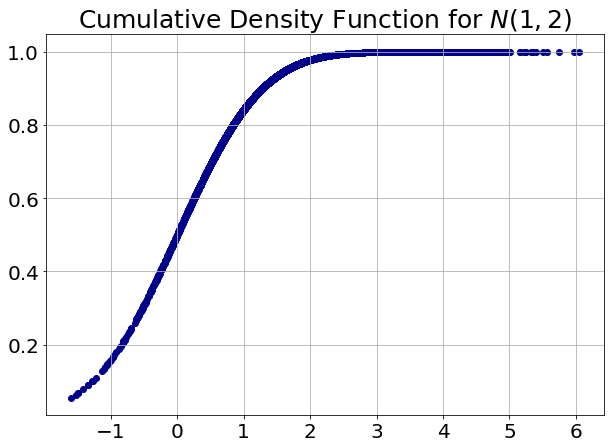

In [ ]:
plt.figure(figsize = (10, 7))

plt.scatter(tmp[0], tmp[1], color = 'darkblue')
plt.tick_params(labelsize = 20)
plt.grid()
plt.title('Cumulative Density Function for $N(1, 2)$', fontsize = 25)
plt.show()

In [ ]:
tmp = np.vstack((array_of_normals, norm_pdf))
tmp = tmp[: , tmp[1, :].argsort()]

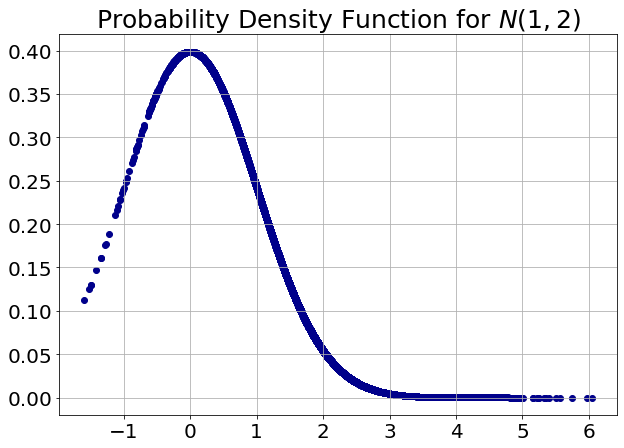

In [ ]:
plt.figure(figsize = (10, 7))

plt.scatter(tmp[0], tmp[1], color = 'darkblue')
plt.tick_params(labelsize = 20)
plt.grid()
plt.title('Probability Density Function for $N(1, 2)$', fontsize = 25)
plt.show()

Можно построить доверительный интервал для среднего своими руками (ну не совсем своими, но не используя встроенные доверительные интервалы в **SciPy**

Метод `set()` считает стандартную ошибку выборочного среднего.

In [ ]:
def mean_confidence_interval(sample, confidence = 0.95):

    n = len(sample)
    mu, se = np.mean(sample), sts.sem(sample) 
    critical_value = sts.t.ppf((1 + confidence) / 2, n - 1)

    up, low = mu + se * critical_value, mu - se * critical_value

    return [low, mu, up]

Метод `.rvs()` у распределения позволяет сгенерировать случайную величину/величины.

Создадим выборку из 100 случайных величин из распределения Стьюдента с 3-мя степенями свободы.

In [ ]:
sample_1 = sts.t.rvs(size = 100, df = 3)
sample_1

array([ 0.70644266, -0.50060605, -1.99454695,  1.34881673,  0.6700646 ,
        0.22741018,  1.85874323,  2.25211514, -0.10300753, -0.69187473,
        1.98401416,  0.02739184, -1.41463404, -0.73976077, -1.07803338,
       -0.62382549, -1.43229939,  0.16262495,  0.11549672,  0.78227175,
        0.97132766, -0.03932902,  1.17580618,  0.02972253, -0.2993355 ,
       -0.87389187,  1.88083954, -0.66767907,  0.78314314,  0.62398759,
        1.14848517, -1.49394037, -0.14425131, -3.73838312,  0.41044917,
        0.60424004,  1.67990994, -0.61420439, -3.0271408 ,  0.65064619,
        0.02694495,  0.40646395, -3.20601062, -0.14457113, -0.41070616,
       -0.0163113 ,  1.54159932, -1.73024166, -1.18796953,  1.04197666,
       -2.63329159, -0.11499718, -0.27399134,  0.36173967,  2.3681726 ,
       -0.71497112,  1.85387867, -4.22819745,  0.49273046, -1.47995187,
        0.25795599, -0.5949211 , -1.62293347,  0.15515065, 13.09312337,
       -0.04956942,  0.81536481,  1.43305305, -1.86024593,  0.26

Применим нашу написанную функцию

In [ ]:
ci_interval = mean_confidence_interval(sample_1, confidence = 0.95)

ci_interval

[-0.3802184664463444, 0.010146568366339497, 0.40051160317902335]

А можно и воспользоваться встроенным методом `interval()` в распределении.

In [ ]:
sts.t.interval(0.95, df = len(sample_1) - 1, loc = np.mean(sample_1), scale = sts.sem(sample_1))

(-0.3802184664463444, 0.40051160317902335)

У нормального распределения также можно посчитать подобные вещи.

In [ ]:
sts.norm.interval(0.95, loc = np.mean(sample_1), scale = sts.sem(sample_1))

(-0.16647863753662714, 0.6544169738093537)

Визуально тест на нормальность распределения можно провести с помощью графика **QQ-plot**, у которого координаты (x, y) это координаты, соответствующие определенному квантилю у теоретического и наблюдаемого/тестируемого распределений.

Подробнее [тут](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

In [ ]:
sample_1 = sts.norm.rvs(loc = 1, scale = 2, size = 1000)
sample_2 = sts.t.rvs(loc = 1, scale = 2, df = 3, size = 1000)

График можно создать с помощью метода `.probplot()`.

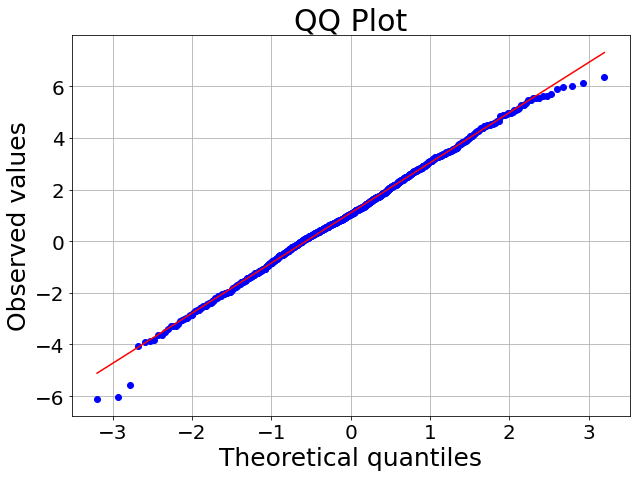

In [ ]:
plt.figure(figsize = (10, 7))
res = sts.probplot(sample_1, plot = plt)
plt.tick_params(labelsize = 20)
plt.xlabel('Theoretical quantiles', fontsize = 25)
plt.ylabel('Observed values', fontsize = 25)
plt.title('QQ Plot', fontsize = 30)
plt.grid()
plt.show()

Для распределения Стьюдента видно, что крайние квантили далеки от нормального распределения, что довольно логично и ожидаемо

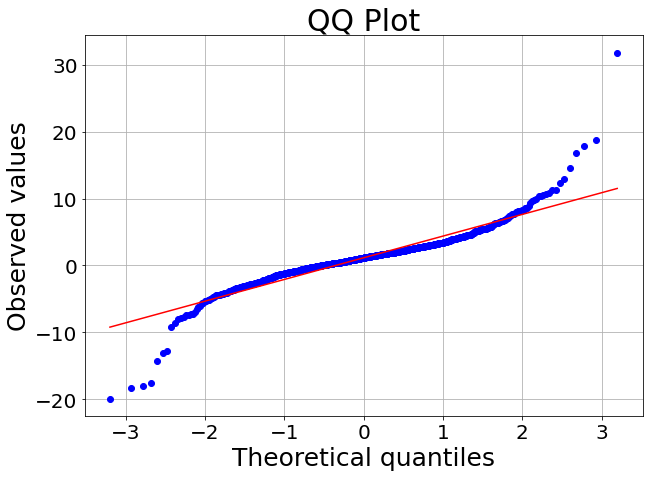

In [ ]:
plt.figure(figsize = (10, 7))
res = sts.probplot(sample_2, plot = plt)
plt.tick_params(labelsize = 20)
plt.xlabel('Theoretical quantiles', fontsize = 25)
plt.ylabel('Observed values', fontsize = 25)
plt.title('QQ Plot', fontsize = 30)
plt.grid()
plt.show()

Также в библиотеке реализованы различные статистические тесты

Есть тесты на нормальность, есть тесты для средних и т.д. (подробнее в документации модуля **stats** бибилотеки **SciPy** [здесь](https://docs.scipy.org/doc/scipy/reference/stats.html))

**[Shapiro-Wilk test](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)** (normality test)

**H0**: the sample has a Gaussian distribution.

**H1**: the sample does not have a Gaussian distribution.

In [ ]:
from scipy.stats import shapiro

test_statistics, p_value = shapiro(sample_2)

print(f'Test statistics is {test_statistics:.4f}, and it is {p_value < 0.05} that we can reject the null hypothesis')

Test statistics is 0.8726, and it is True that we can reject the null hypothesis


In [ ]:
p_value

8.73821667677202e-28

**[Anderson-Darling test](https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test)** (normality test)

**H0**: the sample has a Gaussian distribution.

**H1**: the sample does not have a Gaussian distribution.

In [ ]:
from scipy.stats import anderson

result = anderson(sample_2)

result

AndersonResult(statistic=22.811930101407143, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

**Correlation significance test** 

**H0**: $\rho = 0 $

**H1**: $ \rho \neq 0$

\begin{equation} t = \rho \times \frac{\sqrt{n-2}}{\sqrt{1-\rho^2}} \end{equation}

In [ ]:
from scipy.stats import pearsonr

sample_1 = sts.norm.rvs(loc = 2, scale = 3, size = 10000)
sample_2 = sample_1 * 0.3 + sts.norm.rvs(loc = 0, scale = 0.25, size = 10000)

pearsonr(sample_1, sample_2)

(0.9634955154211478, 0.0)

In [ ]:
sample_1 = sts.norm.rvs(loc = 2, scale = 3, size = 10000)
sample_2 = sts.norm.rvs(loc = 0, scale = 1, size = 10000)

pearsonr(sample_1, sample_2)

(0.010389007943987002, 0.29889824737569465)

**[Chi-squared contingency test](https://en.wikipedia.org/wiki/Chi-squared_test)**

**H0**: the two samples are independent

**H1**: there is a dependency between the samples


In [ ]:
from scipy.stats import chi2_contingency

df = [[50, 40, 70], [3,  8,  20]]

chi2_contingency(df)

(6.738507641847567,
 0.034415307747465186,
 2,
 array([[44.39790576, 40.20942408, 75.39267016],
        [ 8.60209424,  7.79057592, 14.60732984]]))

In [ ]:
chi2_contingency?

**[Dickey-Fuller test, Unit Root test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)**

**H0**: a unit root is present (time series is non-stationary)

**H1**: a unit root is not present (time series is stationary)

In [ ]:
from statsmodels.tsa.stattools import adfuller

point = sts.norm.rvs(loc = 1, scale = 3, size = 1)
series = np.zeros(1000)
series[0] = point
for i in range(1, 1000):
  series[i] = 0.1 + 0.8 * series[i - 1] + sts.norm.rvs(loc = 0, scale = 0.25, size = 1)

adfuller(series)

(-9.973996343704496,
 2.2021731720556868e-17,
 1,
 998,
 {'1%': -3.4369193380671, '10%': -2.56831430323573, '5%': -2.864440383452517},
 99.75208832061412)

In [ ]:
?adfuller

**Student's one sample t-test**

**H0**: $\mu = \mu_0$

**H1**: $\mu \neq \mu_0$

In [ ]:
sample_1 = sts.norm.rvs(loc = 3, scale = 5, size = 1000)

from scipy.stats import ttest_1samp

ttest_1samp(sample_1, 3)

Ttest_1sampResult(statistic=-0.42901921570516677, pvalue=0.668001738890392)

**Student's t-test for two means**

**H0**: $\mu_1 = \mu_2$

**H1**: $\mu_1 \neq \mu_2$

In [ ]:
sample_1 = sts.norm.rvs(loc = 2, scale = 3, size = 100)
sample_2 = sts.norm.rvs(loc = 2, scale = 3, size = 100)

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(sample_1, sample_2)
t_stat, p_value

(-0.8777416170238221, 0.38114776699043507)

**Student's t-test for two paired samples**

**H0**: $\mu_d = 0$

**H1**: $\mu_d \neq 0$

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_value = ttest_rel(sample_1, sample_1 * 2)
t_stat, p_value

(-6.477465656927566, 3.635881580658586e-09)

## Оптимизация

Также в **SciPy** реализован модуль **optimize** для оптимизации функций (доступна как условная, так и безусловная оптимизация). [Подробнее](https://docs.scipy.org/doc/scipy/reference/optimize.html)

Мы будем пользоваться методом `minimize` из этого модуля

In [ ]:
from scipy.optimize import minimize

Напишем простенькую квадратичную функцию одной переменной

In [ ]:
def function_1(x):
  return 3 * x ** 2 - 2 * x + 4

Отобразим ее

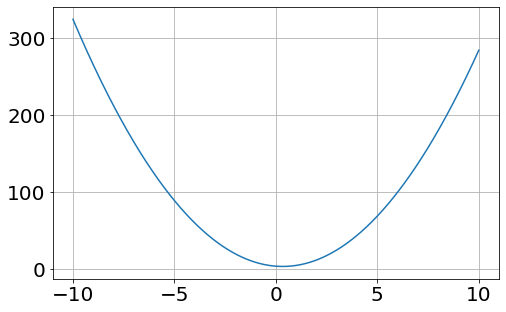

In [ ]:
x = np.linspace(-10, 10, num = 1000)
y = function_1(x)

plt.figure(figsize = (8, 5))
plt.plot(x, y)
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

Найдем минимум функции (напоминание - если требуется максимизировать функцию, то нужно минимизировать отрицательную функцию). Для этого в метод `minimize` передадим нашу функцию и изначальные значения для парамтера, по которому проводим оптимизацию, `x0`

In [ ]:
res = minimize(function_1, x0 = 5)
res

      fun: 3.666666666666677
 hess_inv: array([[0.16666666]])
      jac: array([3.87430191e-07])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([0.33333339])

In [ ]:
function_1(0), function_1(0.3333339)

(4, 3.6666666666676297)

Также можно оптимизировать и функции, которые используют данные. Давайте оценим коэффициенты линейной однофакторной регрессии с помощью метода максимальнго правдоподобия.

Т.к. оптимизировать проще логарифм функции правдоподобия, то сразу приведу его:

\begin{equation} LL = -\frac{n}{2} \log{2\pi} - n \log{\sigma} - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - (\alpha + \beta x_i)^2)\end{equation}

Т.к. мы максимизируем логарифмическую функци правдоподобия, то минимизировать надо отрицательную функцию правдоподобия.

In [ ]:
def norm_reg_loglik(coefs, y, x):

  alpha = coefs[0]
  beta = coefs[1]
  S = coefs[2]

  n = len(y)

  no_data_factor = -n / 2 * np.log(2 * np.pi) - n * np.log(S)
  data_factor = -1 / (2 * S ** 2) * sum((y - alpha - beta * x) ** 2)

  neg_loglik = -1 * (no_data_factor + data_factor) 
  return neg_loglik

Создадим данные

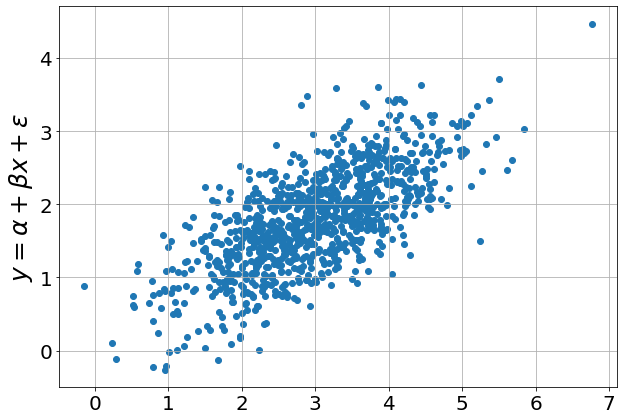

In [ ]:
x = sts.norm.rvs(scale = 1, loc = 3, size = 1000)
alpha, beta = 0.3, 0.5

y = alpha + beta * x + sts.norm.rvs(scale = 0.5, loc = 0, size = 1000)

plt.figure(figsize = (10, 7))
plt.scatter(x, y)
plt.grid()
plt.tick_params(labelsize = 20)
plt.ylabel(r'$y=\alpha + \beta x +\epsilon $', fontsize = 25)
plt.show()

Проведем оптимизацию, в качестве метода будем использовать **slsqp**. Также доступну другие методы - за ними в документацию.

In [ ]:
res_reg = minimize(norm_reg_loglik, [0.1, 0.1, 0.2], args = (y, x, ), method = 'slsqp')
res_reg

     fun: 699.1415354138613
     jac: array([0.0300827 , 0.08968353, 0.01117706])
 message: 'Optimization terminated successfully.'
    nfev: 299
     nit: 50
    njev: 50
  status: 0
 success: True
       x: array([0.32574601, 0.49436631, 0.48685239])

Посмотрим на качество подгонки

In [ ]:
alpha_hat, beta_hat = res_reg['x'][0], res_reg['x'][1]

y_hat = alpha_hat + beta_hat * x

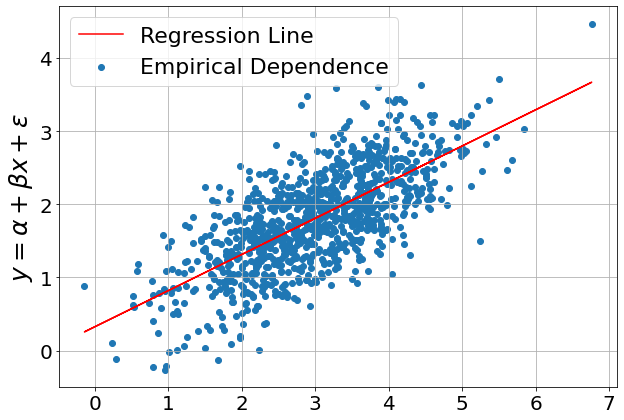

In [ ]:
plt.figure(figsize = (10, 7))
plt.scatter(x, y, label = 'Empirical Dependence')
plt.plot(x, y_hat, label = 'Regression Line', color = 'r')
plt.legend(fontsize = 22)
plt.grid()
plt.tick_params(labelsize = 20)
plt.ylabel(r'$y=\alpha + \beta x +\epsilon $', fontsize = 25)
plt.show()

Теперь давайте попрактикуемся с оптимизацией с ограничениями

Допустим, у нас есть следующая функция полезности, которые ограничена бюджетом. Также мы не можем продавать товары.

\begin{equation} U(x_1, x_2) = s_1 \times x_1 + s_{21} \times x_2 + s_{22} \times x_2^2  \end{equation}

\begin{equation} x_1 \times p_1 + x_2 \times p_2 \leq M \end{equation}

\begin{equation} x_1 \geq 0 \end{equation}
\begin{equation} x_2 \geq 0 \end{equation}

Определим в коде функцию полезности

In [ ]:
def utility_function(quantities, sensitivities):

  q1, q2 = quantities[0], quantities[1]
  s1, s21, s22 = sensitivities[0], sensitivities[1], sensitivities[2]

  return -1 * (s1 * q1 + s21 * q2 + s22 * (q2 ** 2))

Определим бюджетное ограничение

In [ ]:
def budget_constraint(quantities):

  q1, q2 = quantities[0], quantities[1]

  return -1 * (q1 * 5 + q2 * 10 - 100)

В массив cons передадим ограничения. Каждое ограничение представляет из себя словарь с ключами типа и функции. Тип может быть `eq` (equality) и `ineq` (inequality)

Ограничения по самим переменным можно задать массивом bnds, в которых передать границы. Если какой-либо из границ нет - то передается `None`

In [ ]:
sensitivities = [1.5, 2.5, -1.25]

cons = ({'type': 'ineq', 'fun': budget_constraint})

bnds = ((0, None), (0, None))

In [ ]:
res_util = minimize(utility_function, x0 = [1, 1], args = (sensitivities, ), constraints = cons, method = 'slsqp')
res_util

     fun: -30.049999999997368
     jac: array([-1.5, -3. ])
 message: 'Optimization terminated successfully.'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([20.39999994, -0.19999997])

Видим, что оптимальное число второго товара отрицательно. Давайте добавим ограничения по переменным в `bounds`

In [ ]:
res_util = minimize(utility_function, x0 = [1, 1], args = (sensitivities, ), constraints = cons, method = 'slsqp', bounds = bnds)
res_util

     fun: -29.999999999999968
     jac: array([-1.5, -2.5])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([20.,  0.])

## Получение данных с помощью Pandas из Yahoo и прочих ресурсов

С помощью библиотеки **pandas_datareader** можно подгружать различные данные (финансовые и экономические, как правило)

Подробнее - [здесь](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-wb)

In [ ]:
import pandas_datareader as pdr
from datetime import datetime as dt

In [ ]:
start = dt(2018, 1, 1)
end = dt(2020, 12, 31)

In [ ]:
result = pdr.get_data_yahoo('TSLA', start = start, end = end)

In [ ]:
result

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
...,...,...,...,...,...,...
2020-12-24,666.090027,641.000000,642.989990,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.510010,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.000000,665.989990,22910800.0,665.989990


Можно обращаться к различным источникам

In [ ]:
import pandas_datareader.data as web

In [ ]:
result = web.DataReader("5_Industry_Portfolios", "famafrench")
result

{0:          Cnsmr  Manuf  HiTec  Hlth   Other
 Date                                      
 2016-03   5.81   8.10   7.91   2.92   7.06
 2016-04  -0.13   3.49  -3.06   3.56   2.30
 2016-05   0.74  -0.19   4.09   2.47   0.91
 2016-06   1.73   2.65  -0.90   0.14  -2.71
 2016-07   2.46   1.21   6.65   6.01   3.56
 2016-08  -1.00   0.37   0.78  -3.21   3.36
 2016-09  -1.44   1.05   2.03   0.35  -1.25
 2016-10  -2.52  -2.31  -1.46  -7.44   0.59
 2016-11   1.53   5.29   1.65   1.38  11.27
 2016-12   1.33   1.57   1.62   0.85   2.94
 2017-01   1.37   0.68   4.43   2.21   1.02
 2017-02   2.99   2.26   3.95   7.10   3.72
 2017-03   0.78  -0.18   1.91  -0.15  -1.67
 2017-04   1.81   0.31   2.23   1.09   0.26
 2017-05   2.00   0.32   3.10  -0.43  -0.42
 2017-06  -1.18   0.29  -2.14   5.56   4.18
 2017-07  -0.10   2.30   4.07   0.53   1.44
 2017-08  -1.55  -0.81   1.98   1.79  -0.40
 2017-09   1.73   4.69   0.17   1.50   4.31
 2017-10   1.66   2.20   4.62  -2.24   2.03
 2017-11   5.90   3.14   1.47

Можно поискать, есть ли информация, содержащая следующие вещи

In [ ]:
from pandas_datareader import wb

results = wb.search('gdp.*capita.*const')

In [ ]:
results

,id,name,unit,source,sourceNote,sourceOrganization,topics
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9266,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9268,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9270,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9271,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [ ]:
gdp = wb.download(indicator = 'NY.GDP.PCAP.KD', country = ['US', 'CA', 'RU'], start = 2010, end=2020)

In [ ]:
gdp = gdp.reset_index()
gdp

,index,country,year,NY.GDP.PCAP.KD
0,0,Canada,2020,NaN
1,1,Canada,2019,51588.761434
2,2,Canada,2018,51476.200774
3,3,Canada,2017,51170.475841
4,4,Canada,2016,50193.750410
5,5,Canada,2015,50262.027666
6,6,Canada,2014,50306.944624
7,7,Canada,2013,49397.523315
8,8,Canada,2012,48785.936082
9,9,Canada,2011,48464.496282


Часть ресурсов требует наличия **API**. Как правило, ключ можно получить в личном кабинете этого ресурс после регистрации. Возможно за некоторые **API** или их расширенный функционал, нужно платить

## Скрапинг данных (базово)

Для скрапинга данных используются различные библиотеки. Базовыми являются **requests**, с помощью которой делается запрос к странице/сайту, и **urllib**.

Для парсинга полученного кода страницы с помощью запроса можно пользоваться библиотекой **bs4**, а именно модулем **BeautifulSoup**.

Мы бедм скрапить [следующую страницу](http://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.05.2019&UniDbQuery.To=1.03.2021)

In [ ]:
from bs4 import BeautifulSoup
from requests import get
import urllib

import time

import datetime
from dateutil.relativedelta import relativedelta

В url'e сами укажем дату, с которой вытащить значения и даты, по которую вытаскивать. Применим метод `get` к данному url.

In [ ]:
end_year = time.localtime()[0]
end_month = str(time.localtime()[1] - 1)
    
start_year = 2019
start_month = str(8)

url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.'
url = url + start_month + '.' + str(start_year) + '&UniDbQuery.To=3.' + end_month + '.' + str(end_year)

response = get(url)

Получили какую-то HTML'ную кашу. Но если ее развернуть можно увидеть нужные нам данные по ставкам. Также известно, что HTML все же имеет свою структуру, из которой можно выцепить ту часть, которая нам нужна

In [ ]:
response.text

'\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    \r\n\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\r\n<meta name="format-detection" content="telephone=no" />\r\n<meta name="zoom:lang" content="ru" />\r\n    <meta name="zoom:last-modified" content="Fri, 12 Mar 2021 16:15:11 GMT" />\r\n<title>Динамика максимальной процентной ставки (по&#160;вкладам в&#160;российских рублях) десяти кредитных организаций, привлекающих наибольший объём депозитов физических лиц | Банк России</title>\r\n\r\n\r\n\r\n    <meta property="og:image" content="/common/images/share-1.jpg" />\r\n\r\n    \r\n\r\n\r\n            <link rel="stylesheet" type="text/css" href="/common/libs/jquery-ui/jquery-ui.min.css?v=v3348762655" media="all">\r\n\r\n            <!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.

Воспользуемся методом `BeautifulSoup`, передав в него код (текст) страницы и указав вид парсера

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')

Получили уже что-то более структурированное

In [ ]:
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="telephone=no" name="format-detection">
<meta content="ru" name="zoom:lang">
<meta content="Fri, 12 Mar 2021 16:15:11 GMT" name="zoom:last-modified"/>
<title>Динамика максимальной процентной ставки (по вкладам в российских рублях) десяти кредитных организаций, привлекающих наибольший объём депозитов физических лиц | Банк России</title>
<meta content="/common/images/share-1.jpg" property="og:image"/>
<link href="/common/libs/jquery-ui/jquery-ui.min.css?v=v3348762655" media="all" rel="stylesheet" type="text/css"/>
<!--[if IE 9]><link rel="stylesheet" type="text/css" href="/common/style/main-ie9.css?v=v3703271909" media="all"><![endif]-->
<!--[if gt IE 9]><!--><link href="/common/style/main.css?v=v2793958826" media="all" rel="

Можно открыть код страницы и при наведении на него будет подсвечиваться тот, участок страницы, на который мы наводим в ее коде.

Можно увидеть, что нужные нам данные находятся в **table-wrapper** части

In [ ]:
soup.find_all('div', class_ = 'table-wrapper')[0]

<div class="table-wrapper">
<div class="table">
<table class="data">
<tr>
<th>Декада</th>
<th>Ставка, %</th>
</tr>
<tr>
<td>I.03.2021</td>
<td>4,5290</td>
</tr>
<tr>
<td>III.02.2021</td>
<td>4,5090</td>
</tr>
<tr>
<td>II.02.2021</td>
<td>4,5290</td>
</tr>
<tr>
<td>I.02.2021</td>
<td>4,4660</td>
</tr>
<tr>
<td>III.01.2021</td>
<td>4,4860</td>
</tr>
<tr>
<td>II.01.2021</td>
<td>4,4860</td>
</tr>
<tr>
<td>I.01.2021</td>
<td>4,4860</td>
</tr>
<tr>
<td>III.12.2020</td>
<td>4,4860</td>
</tr>
<tr>
<td>II.12.2020</td>
<td>4,4860</td>
</tr>
<tr>
<td>I.12.2020</td>
<td>4,4560</td>
</tr>
<tr>
<td>III.11.2020</td>
<td>4,4390</td>
</tr>
<tr>
<td>II.11.2020</td>
<td>4,5390</td>
</tr>
<tr>
<td>I.11.2020</td>
<td>4,4190</td>
</tr>
<tr>
<td>III.10.2020</td>
<td>4,4190</td>
</tr>
<tr>
<td>II.10.2020</td>
<td>4,3690</td>
</tr>
<tr>
<td>I.10.2020</td>
<td>4,3260</td>
</tr>
<tr>
<td>III.09.2020</td>
<td>4,3960</td>
</tr>
<tr>
<td>II.09.2020</td>
<td>4,3960</td>
</tr>
<tr>
<td>I.09.2020</td>
<td>4,4060</td>

Давайте запишем и используем метод `.find_all()` к данным

In [ ]:
rates_table = soup.find_all('div', class_ = 'table-wrapper')[0]
    
rates_n_dates = rates_table.find_all('td')

С данными ниже дальше будем проводить цикл для окончательной сборки

In [ ]:
rates_n_dates

[<td>I.03.2021</td>,
 <td>4,5290</td>,
 <td>III.02.2021</td>,
 <td>4,5090</td>,
 <td>II.02.2021</td>,
 <td>4,5290</td>,
 <td>I.02.2021</td>,
 <td>4,4660</td>,
 <td>III.01.2021</td>,
 <td>4,4860</td>,
 <td>II.01.2021</td>,
 <td>4,4860</td>,
 <td>I.01.2021</td>,
 <td>4,4860</td>,
 <td>III.12.2020</td>,
 <td>4,4860</td>,
 <td>II.12.2020</td>,
 <td>4,4860</td>,
 <td>I.12.2020</td>,
 <td>4,4560</td>,
 <td>III.11.2020</td>,
 <td>4,4390</td>,
 <td>II.11.2020</td>,
 <td>4,5390</td>,
 <td>I.11.2020</td>,
 <td>4,4190</td>,
 <td>III.10.2020</td>,
 <td>4,4190</td>,
 <td>II.10.2020</td>,
 <td>4,3690</td>,
 <td>I.10.2020</td>,
 <td>4,3260</td>,
 <td>III.09.2020</td>,
 <td>4,3960</td>,
 <td>II.09.2020</td>,
 <td>4,3960</td>,
 <td>I.09.2020</td>,
 <td>4,4060</td>,
 <td>III.08.2020</td>,
 <td>4,4250</td>,
 <td>II.08.2020</td>,
 <td>4,4500</td>,
 <td>I.08.2020</td>,
 <td>4,5150</td>,
 <td>III.07.2020</td>,
 <td>4,5840</td>,
 <td>II.07.2020</td>,
 <td>4,5490</td>,
 <td>I.07.2020</td>,
 <td>4,6290</td>,
 

In [ ]:
dates = []
rates = []
    
for i, j in enumerate(rates_n_dates):
    if i%2 == 0:
        dates.append(j.text)
    else:
        rates.append(j.text)
            
rates = list(map(lambda x: float(x.replace(',', '.')), rates))
            
rates_table = pd.DataFrame({'Date': dates, 'Rate': rates})

Получили красивую и удобную табличку с данными

In [ ]:
rates_table

,Date,Rate
0,I.03.2021,4.529
1,III.02.2021,4.509
2,II.02.2021,4.529
3,I.02.2021,4.466
4,III.01.2021,4.486
...,...,...
62,II.06.2019,7.364
63,I.06.2019,7.306
64,III.05.2019,7.374
65,II.05.2019,7.447


Объединим все в 1 функцию

In [ ]:
def retrieve_top10_max_deposit_rates(start_year, start_month, save = False):
    
    """Returns (parse) the data on maximum deposit rates across top 10 (by assets) banks from CBR.
    
    
    Keyword arguments:
    start_year -- a year to begin collecting data from (can be either int or str)
    start_month -- a month to begin collection data from (can be either int or str; values - from 1 to 12)
    -----------------------------------------------------
    One needs to turn off VPN to succeed with the request
    """
    
    if start_month > 12 or start_month < 1:
        raise ValueError('Start month should be between 1 and 12')
    
    end_year = time.localtime()[0]
    end_month = str(time.localtime()[1] - 1)
    
    start_month = str(start_month)
    
    if len(start_month) == 1:
        start_month = str(0) + start_month
    
    if len(end_month) == 1:
        end_month = str(0) + end_month
        
    url = 'https://www.cbr.ru/statistics/avgprocstav/?UniDbQuery.Posted=True&UniDbQuery.From=1.'
    url = url + start_month + '.' + str(start_year) + '&UniDbQuery.To=3.' + end_month + '.' + str(end_year)
    
    response = get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    rates_table = soup.find_all('div', class_ = 'table-wrapper')[0]
    
    rates_n_dates = rates_table.find_all('td')
    
    dates = []
    rates = []
    
    for i, j in enumerate(rates_n_dates):
        
        if i%2 == 0:
            dates.append(j.text)
        else:
            rates.append(j.text)
            
    rates = list(map(lambda x: float(x.replace(',', '.')), rates))
            
    rates_table = pd.DataFrame({'Date': dates, 'Rate': rates})
    
    if save:
        print('Type the path to the file with its name')
        rates_table.to_csv(str(input()) + '.csv')
    
    return rates_table

In [ ]:
start_year = 2019
start_month = 8
retrieve_top10_max_deposit_rates(start_year, start_month, save = False)

,Date,Rate
0,III.02.2021,4.509
1,II.02.2021,4.529
2,I.02.2021,4.466
3,III.01.2021,4.486
4,II.01.2021,4.486
5,I.01.2021,4.486
6,III.12.2020,4.486
7,II.12.2020,4.486
8,I.12.2020,4.456
9,III.11.2020,4.439


С помощью библиотеки **urlllib** и метода `urlretrieve()` в `.request` можно также выгружать файлы с сайтов (не залезая на сайт и прожимая кнопочки)

Указать требутеся url до файла для скачивания (ссылка, по которой файл скачивается) и путь, куда сохранить файл

In [ ]:
nosb_path = 'https://www.cbr.ru/vfs/statistics/pdko/int_rat/loans_deposits_except_for_Sberbank.xlsx'
nosb_store_path = '/content/NOSBER_DEPOSITS.xlsx'
    
urllib.request.urlretrieve(nosb_path, nosb_store_path)

('/content/NOSBER_DEPOSITS.xlsx', <http.client.HTTPMessage at 0x7fc3ae645b10>)

In [ ]:
nosber_rates = pd.read_excel('/content//NOSBER_DEPOSITS.xlsx')

Данные действительно загрузили, однако их еще нужно обработать (ручками - однако, если структура файла не меняется, то можно каждый месяц повторять один и тот же скрипт)

In [ ]:
nosber_rates

,Средневзвешенные процентные ставки кредитных организаций по кредитным и депозитным операциям в рублях без учета ПАО Сбербанк (% годовых),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86
0,Операции,Срок,Январь 2014,Февраль 2014,Март 2014,Апрель 2014,Май 2014,Июнь 2014,Июль 2014,Август 2014,Сентябрь 2014,Октябрь 2014,Ноябрь 2014,Декабрь 2014,Январь 2015,Февраль 2015,Март 2015,Апрель 2015,Май 2015,Июнь 2015,Июль 2015,Август 2015,Сентябрь 2015,Октябрь 2015,Ноябрь 2015,Декабрь 2015,Январь 2016,Февраль 2016,Март 2016,Апрель 2016,Май 2016,Июнь 2016,Июль 2016,Август 2016,Сентябрь 2016,Октябрь 2016,Ноябрь 2016,Декабрь 2016,Январь 2017,Февраль 2017,...,Октябрь 2017,Ноябрь 2017,Декабрь 2017,Январь 2018,Февраль 2018,Март 2018,Апрель 2018,Май 2018,Июнь 2018,Июль 2018,Август 2018,Сентябрь 2018,Октябрь 2018,Ноябрь 2018,Декабрь 2018,Январь 2019,Февраль 2019,Март 2019,Апрель 2019,Май 2019,Июнь 2019,Июль 2019,Август 2019,Сентябрь 2019,Октябрь 2019,Ноябрь 2019,Декабрь 2019,Январь 2020,Февраль 2020,Март 2020,Апрель 2020,Май 2020,Июнь 2020,Июль 2020,Август 2020,Сентябрь 2020,Октябрь 2020,Ноябрь 2020,Декабрь 2020,Январь 2021
1,Кредиты физическим лицам,"до 1 года, включая ""до востребования""",26.21,24.01,24.11,21.13,25.69,24.73,24.07,24.71,24.3,24.64,24.86,25.03,29.28,28.94,27.44,26.43,29.16,27,26.89,26.11,25.24,25.71,25.5,24.54,25.85,23.93,24.29,21.79,23.6,22.21,23.51,24.23,23.95,23.85,23.07,21.64,22.88,21.38,...,19,19.66,19.53,19.56,19.06,17.92,16.42,18.62,18.63,17.82,18.7,18.19,18.64,18.46,18.42,16.17,15.57,14.76,14.79,15.08,14.82,14.62,14.16,13.75,13.17,14.98,14.61,14.59,13.85,13.32,14.34,13.91,13.19,12.78,12.46,12.65,12.82,12.84,12.63,12.56
2,NaN,свыше 1 года,18.91,18.5,18.26,18.21,18.52,18.54,18.68,18.33,18.18,17.96,18.19,18.19,22.63,23.52,24.55,22.53,21.68,20.44,20.13,19.55,19.22,19.12,18.71,17.85,18.49,17.02,18.21,17.81,17.91,17.71,17.63,17.2,17,16.69,16.33,15.88,16.85,16.44,...,14.34,14.09,13.57,14.29,14.09,13.95,13.61,13.61,13.39,13.36,13.29,12.71,12.69,12.56,12.62,13.22,13.08,13.19,13.17,13.31,13.1,13.05,12.81,12.58,12.4,12.17,11.77,11.96,11.65,11.28,11.68,11.43,11.1,10.59,10.4,10.16,9.78,9.86,9.68,10.14
3,Кредиты нефинансовым организациям,"до 1 года, включая ""до востребования""",9.63,9.81,10.66,10.73,11.07,11.14,11,10.9,11.08,11.3,12.38,16.73,19.82,18.34,17.91,17.19,16.05,15.62,14.7,14.33,14.03,13.72,13.83,13.89,13.48,13.48,13.33,13.06,13.17,12.79,12.53,12.26,12.21,12.25,11.88,11.99,11.73,11.65,...,9.99,9.88,9.73,9.3,9.12,9,8.92,8.91,8.94,8.88,8.8,9.09,9,9.06,9.24,9.23,9.25,9.25,9.15,9.14,9.03,8.71,8.52,8.29,8.18,7.91,7.8,7.42,7.48,7.75,7.62,7.24,6.89,6.38,6.15,6.24,6.01,5.88,6.18,6.02
4,NaN,в том числе субъектам малого и среднего предпр...,12.63,12.73,12.68,12.95,12.99,13.04,13.17,13.24,13.34,13.41,13.87,16.25,18.91,19.06,19.16,18.96,18.62,18.22,17.78,17.55,17.17,17.12,16.88,16.6,16.56,16.54,16.35,16.6,16.47,16.22,15.8,15.76,15.34,15.24,15.23,14.82,14.77,14.04,...,13.3,12.79,12.4,12.92,11.89,11.63,11.74,11.86,11.67,11.69,11.63,11.16,11.5,10.47,11.04,11.19,11.36,11.03,11.35,11.11,11.29,11.27,11.03,10.8,10.76,10.53,10.32,10.53,9.96,9.4,9.94,9.91,9.43,8.27,7.6

In [ ]:
nosber_rates = nosber_rates[nosber_rates.index.isin([1, 8, 9, 10])].T.reset_index(drop = True).iloc[2:].dropna()

In [ ]:
nosber_rates

,1,8,9,10
2,26.21,7.54,6.46,8.4
3,24.01,7.41,6.25,8.47
4,24.11,7.44,6.23,8.46
5,21.13,7.71,6.52,8.58
6,25.69,7.83,6.56,8.85
...,...,...,...,...
82,12.65,3.93,3.66,4.18
83,12.82,3.94,3.71,4.24
84,12.84,4.03,3.79,4.24
85,12.63,4.16,3.97,4.3


In [ ]:
nosber_rates.columns = ['Date', 'NDM_NOSB_RATE', 'DEP1Y_NOSB_RATE', 'NDM_NOSB_DEP1Y_RATE']
#nosber_rates['Date'] = [(start_date + relativedelta(months = i)) for i in range(nosber_rates.shape[0])]
nosber_rates.head()

,Date,NDM_NOSB_RATE,DEP1Y_NOSB_RATE,NDM_NOSB_DEP1Y_RATE
2,26.21,7.54,6.46,8.4
3,24.01,7.41,6.25,8.47
4,24.11,7.44,6.23,8.46
5,21.13,7.71,6.52,8.58
6,25.69,7.83,6.56,8.85
